# Activity 2

Imports

In [15]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random
from networkx.readwrite import json_graph
import json

In [2]:
COLOR_BG = "#a8dadc"
COLOR_FG = "#457b9d"
SIZE_BG_NODES = 800
SIZE_FG_NODES = 2400
EDGE_BG_WEIGHT = 4
EDGE_FG_WEIGHT = 24
MATRIX_SIDE = 10
NO_FG_NODES = 20
FIG_SIZE = (12, 12)


**Task 1: Create the background matrix of nodes**

In [4]:
G = nx.Graph()
rows = [i for i in range( MATRIX_SIDE)]
columns = [i for i in range( MATRIX_SIDE)]

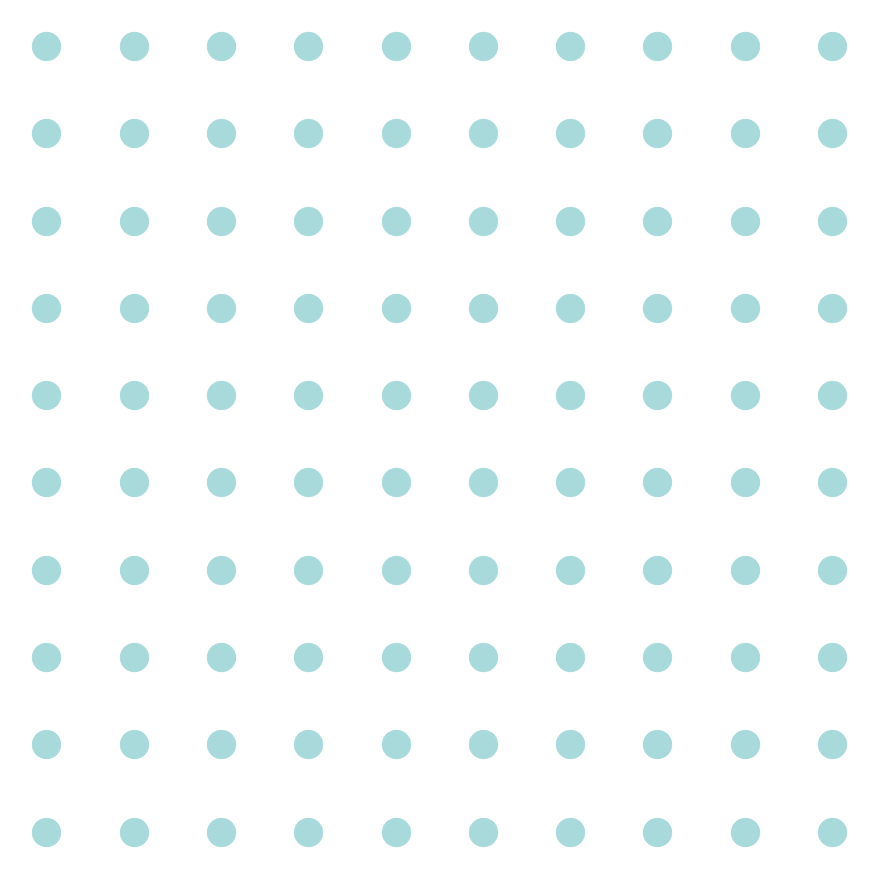

In [6]:
for i in rows :
    for j in columns :
        G.add_node((i*10 + j) ,pos=(i,j))
             
pos=nx.get_node_attributes(G,'pos')
all_nodes = list(G.nodes)
plt.figure(figsize=FIG_SIZE)
nx.draw(G,pos, node_color=COLOR_BG , node_size = SIZE_BG_NODES )


**Task 2: Choose background nodes randomly and convert them into foreground nodes.**

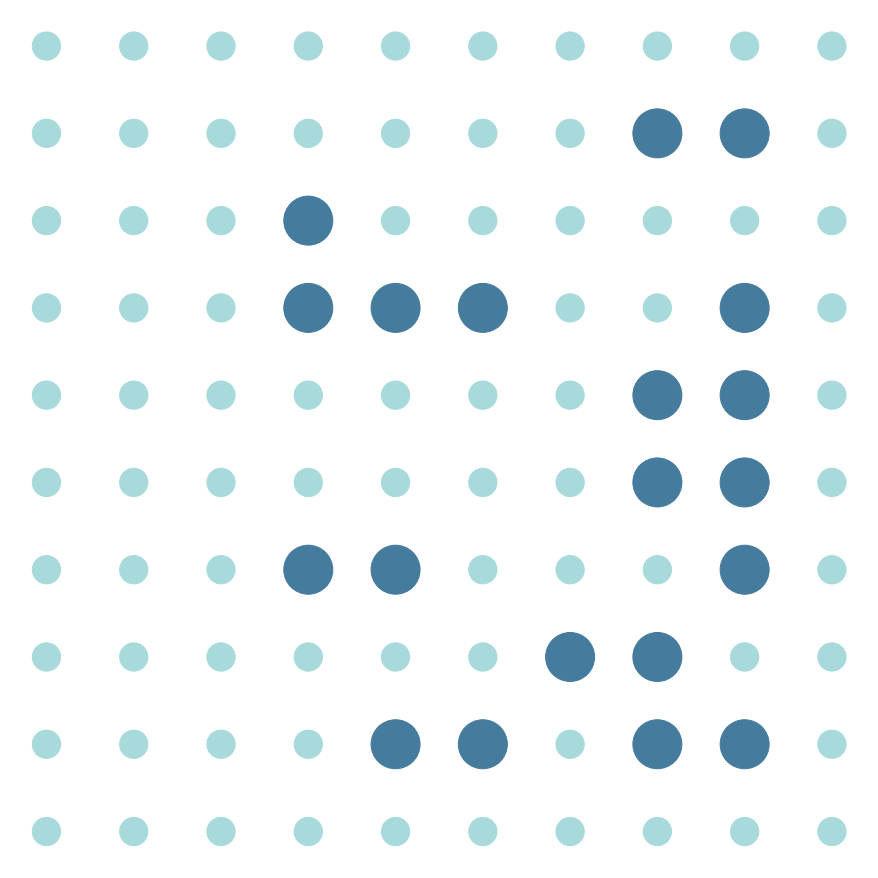

In [7]:
nodes_withoutedges = all_nodes.copy()
Edges = [i for i in all_nodes if G.nodes[i]['pos'][0] in [0,MATRIX_SIDE-1] or G.nodes[i]['pos'][1] in [0,MATRIX_SIDE-1]]

nodes_withoutedges  =[i for i in nodes_withoutedges if i not in Edges]
    
FG_nodes = random.sample(nodes_withoutedges,k = NO_FG_NODES)

BG_nodes = [i for i in all_nodes if i not in FG_nodes]

color_map = []
size_map = []
for node in G:
    if node in FG_nodes :
        color_map.append(COLOR_FG)
        size_map.append(SIZE_FG_NODES)
    else: 
        color_map.append(COLOR_BG)
        size_map.append(SIZE_BG_NODES)

plt.figure(figsize=(12,12))
nx.draw(G,pos, node_color=color_map , node_size = size_map )

**Task 3: Add the edges.**

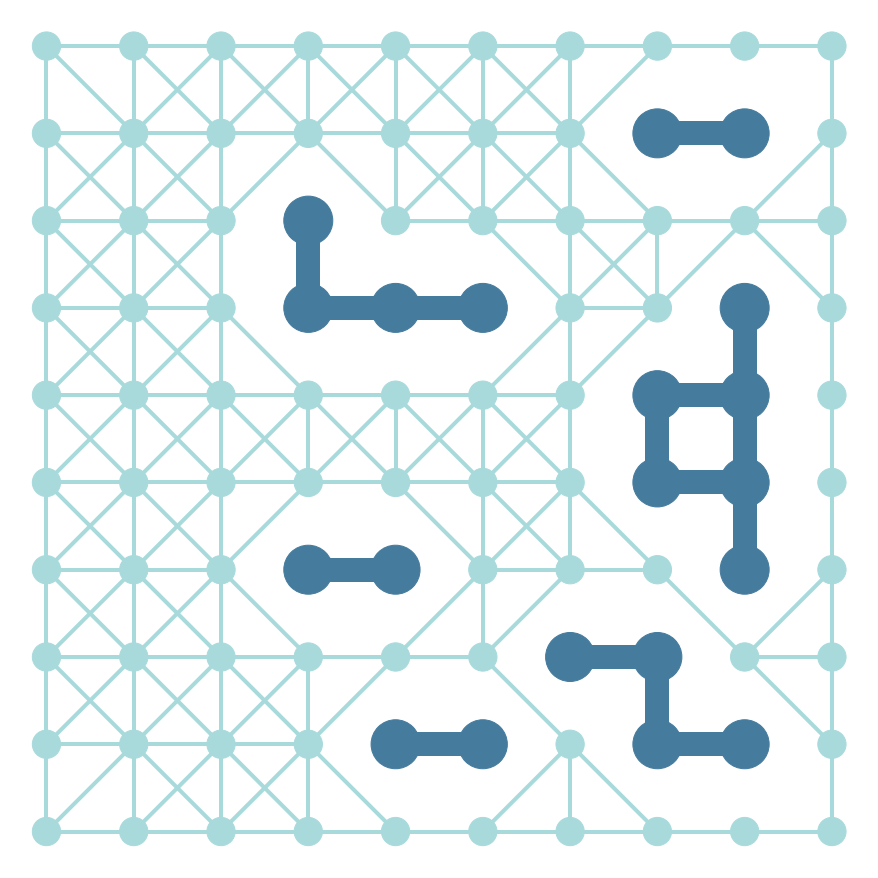

In [22]:

# functions for adding edges 
def adding_edge_BG(i,j):
    G.add_edge(i , j,color=COLOR_BG, edge_weight = EDGE_BG_WEIGHT)
def adding_edge_FG(i,j):
     G.add_edge(i , j ,color=COLOR_FG ,edge_weight = EDGE_FG_WEIGHT )


for i in all_nodes :
    if G.nodes[i]['pos'][0] in [0,MATRIX_SIDE-1] and G.nodes[i]['pos'][1] not in [MATRIX_SIDE-1] : # Adding edges to border nodes
        adding_edge_BG(i,i+1)
    if G.nodes[i]['pos'][1] in [0,MATRIX_SIDE-1] and G.nodes[i]['pos'][0] not in [MATRIX_SIDE-1]: # Adding edges to border nodes
        adding_edge_BG(i,i+10)
    if i in BG_nodes and i not in Edges: # Adding Edges to Background nodes
        if i-1 in BG_nodes :
            adding_edge_BG(i,i-1)
        if i+1 in BG_nodes :
            adding_edge_BG(i,i+1)
        if i+10 in BG_nodes :
            adding_edge_BG(i,i+MATRIX_SIDE)
        if i-10 in BG_nodes :
            adding_edge_BG(i,i-MATRIX_SIDE)
        if i-11 in BG_nodes :
            adding_edge_BG(i,i-(MATRIX_SIDE+1))
        if i+11 in BG_nodes :
            adding_edge_BG(i,i+(MATRIX_SIDE+1))  
        if i-9 in BG_nodes :
            adding_edge_BG(i,i-(MATRIX_SIDE-1))
        if i+9 in BG_nodes :
            adding_edge_BG(i,i+(MATRIX_SIDE-1))
            
    if i in FG_nodes and i not in Edges: # Adding Edges to Foreground nodes
        if i-1 in FG_nodes :
            adding_edge_FG(i,i-1)
        if i+1 in FG_nodes :
            adding_edge_FG(i,i+1)
        if i+10 in FG_nodes :
           adding_edge_FG(i,i+MATRIX_SIDE)
        if i-10 in FG_nodes :
            adding_edge_FG(i,i-MATRIX_SIDE)   
            
edges = nx.edges(G)

colors = [G[a][b]['color'] for a,b in edges]  
edge_weight = [G[a][b]['edge_weight'] for a,b in edges]
     
# setting attributes for nodes

for i in all_nodes :
    if i in FG_nodes : 
       G.nodes[i]['colour'] = COLOR_FG
       G.nodes[i]['node_type'] = 'FG'
    if i in BG_nodes : 
       G.nodes[i]['colour'] = COLOR_BG
       G.nodes[i]['node_type'] = 'BG'

plt.figure(figsize=(12,12))
nx.draw(G,pos, node_color=color_map, edge_color=colors ,
        node_size = size_map , width = edge_weight )


**Task 4:**

• Print out the graph info using the nx.info() function

In [11]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 100\nNumber of edges: 217\nAverage degree:   4.3400'

• Print out the density of the graph

In [12]:
nx.density(G)

0.043838383838383836

• Print out the degree centrality of its nodes

In [13]:
nx.degree_centrality(G)

{0: 0.030303030303030304,
 1: 0.04040404040404041,
 2: 0.05050505050505051,
 3: 0.05050505050505051,
 4: 0.05050505050505051,
 5: 0.05050505050505051,
 6: 0.05050505050505051,
 7: 0.05050505050505051,
 8: 0.04040404040404041,
 9: 0.030303030303030304,
 10: 0.04040404040404041,
 11: 0.08080808080808081,
 12: 0.08080808080808081,
 13: 0.08080808080808081,
 14: 0.08080808080808081,
 15: 0.08080808080808081,
 16: 0.08080808080808081,
 17: 0.08080808080808081,
 18: 0.08080808080808081,
 19: 0.04040404040404041,
 20: 0.05050505050505051,
 21: 0.08080808080808081,
 22: 0.07070707070707072,
 23: 0.07070707070707072,
 24: 0.07070707070707072,
 25: 0.07070707070707072,
 26: 0.06060606060606061,
 27: 0.06060606060606061,
 28: 0.07070707070707072,
 29: 0.05050505050505051,
 30: 0.04040404040404041,
 31: 0.07070707070707072,
 32: 0.05050505050505051,
 33: 0.010101010101010102,
 34: 0.06060606060606061,
 35: 0.06060606060606061,
 36: 0.020202020202020204,
 37: 0.010101010101010102,
 38: 0.0707070707

**Task 5:**

In [16]:
data1 = json_graph.node_link_data(G)

file_name = input("Enter the file name (.json)")


file_name_json = file_name +str(".json") #add .json to the filename
file_output = open(file_name_json, "w")  #open file to write JSON data 
json.dump(data1,file_output , indent = 5) 

file_output.close()

Enter the file name (.json)ad
